In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ConstantKernel
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import os
import shutil

In [2]:
import pyvisa
#import keyboard
import csv

In [3]:
class Info:
    icase = 6
    icmd = 1
    a0 = -20.
    a1 = 20.
    b0 = -20.
    b1 = 20.
    ndim = 1 ##
    ntrain0 = 36
    nn1 = 200
    nn2 = 1  ##
    tolsig = 1e-3
    models12 = False
    rm = None
    yokogawa = None
    yokogawa2 = None
    multimeter = None
    fname_accum = None

In [4]:
class GP():
    def __init__(self, ndim):
        self.ndim = ndim
        if True:
            #    kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
            self.kernel = ConstantKernel(1.0, constant_value_bounds="fixed") * \
                RBF(1.0, length_scale_bounds="fixed")
        else:
            self.kernel = DotProduct() + WhiteKernel()
        self.gp = GaussianProcessRegressor(
            kernel=self.kernel, n_restarts_optimizer=0)

    def train0(self):
        ntrain1 = 0
        if os.path.isfile(Info.fname_accum):
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                ntrain1 = ntrain1+1
            afile.close()
            X = np.zeros((ntrain1, self.ndim))
            y = np.zeros(ntrain1)
            i = 0
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                for j in range(self.ndim):
                    X[i, j] = float(line.split()[j])
                y[i] = float(line.split()[-1])
                i = i+1
            afile.close()
            self.gp.fit(X, y)
            del X, y, ntrain1, i, j, line

    def predict(self, X_test):
        y_pred, y_std = self.gp.predict(X_test, return_std=True)
        if X_test.shape[0] == 1:
            y_pred = y_pred[0]
            y_std = y_std[0]
        return y_pred, y_std

    def tpredict(self, X_test):
        ntrain01 = 0
        if os.path.isfile(Info.fname_accum):
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                ntrain01 = ntrain01+1
            afile.close()
            X = np.zeros((ntrain01, self.ndim))
            y = np.zeros(ntrain01)
            i = 0
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                for j in range(self.ndim):
                    X[i, j] = float(line.split()[j])
                y[i] = float(line.split()[-1])
                i = i+1
            afile.close()
            ntrain1 = i
            self.gp.fit(X, y)
            del X, y, i, ntrain1, line, ntrain01, j
        y_pred, y_std = self.gp.predict(X_test, return_std=True)
        return y_pred, y_std

In [5]:
class Multi_knn():
    def __init__(self, ndim, models12):
        self.ndim = ndim
        self.models12 = models12
        self.knn4 = KNeighborsRegressor(
            n_neighbors=4, leaf_size=30, p=2,  weights='distance')
        self.knn5 = KNeighborsRegressor(
            n_neighbors=5, leaf_size=30, p=2,  weights='distance')
        self.knn6 = KNeighborsRegressor(
            n_neighbors=6, leaf_size=30, p=2,  weights='distance')
        self.knn7 = KNeighborsRegressor(
            n_neighbors=7, leaf_size=30, p=2,  weights='distance')
        self.knn8 = KNeighborsRegressor(
            n_neighbors=8, leaf_size=30, p=2,  weights='distance')
        self.knn9 = KNeighborsRegressor(
            n_neighbors=9, leaf_size=30, p=2,  weights='distance')
        if models12:
            self.knn41 = KNeighborsRegressor(
                n_neighbors=4, leaf_size=30, p=1.5, weights='distance')
            self.knn51 = KNeighborsRegressor(
                n_neighbors=5, leaf_size=30, p=1.5, weights='distance')
            self.knn61 = KNeighborsRegressor(
                n_neighbors=6, leaf_size=30, p=1.5, weights='distance')
            self.knn71 = KNeighborsRegressor(
                n_neighbors=7, leaf_size=30, p=1.5, weights='distance')
            self.knn81 = KNeighborsRegressor(
                n_neighbors=8, leaf_size=30, p=1.5, weights='distance')
            self.knn91 = KNeighborsRegressor(
                n_neighbors=9, leaf_size=30, p=1.5, weights='distance')

    def train0(self):
        ntrain1 = 0
        if os.path.isfile(Info.fname_accum):
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                ntrain1 = ntrain1+1
            afile.close()
            X = np.zeros((ntrain1, self.ndim))
            y = np.zeros(ntrain1)
            i = 0
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                for j in range(self.ndim):
                    X[i, j] = float(line.split()[j])
                y[i] = float(line.split()[-1])
                i = i+1
            afile.close()
            self.knn4.fit(X, y)
            self.knn5.fit(X, y)
            self.knn6.fit(X, y)
            self.knn7.fit(X, y)
            self.knn8.fit(X, y)
            self.knn9.fit(X, y)
            if self.models12:
                self.knn41.fit(X, y)
                self.knn51.fit(X, y)
                self.knn61.fit(X, y)
                self.knn71.fit(X, y)
                self.knn81.fit(X, y)
                self.knn91.fit(X, y)
            del X, y, ntrain1, i, j, line

    def predict(self, X_test):
        anarray = []
        ypred = self.knn4.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn5.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn6.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn7.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn8.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn9.predict(X_test)
        anarray.append(ypred)
        if self.models12:
            ypred = self.knn41.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn51.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn61.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn71.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn81.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn91.predict(X_test)
            anarray.append(ypred)
        anarray = np.array(anarray)
        return np.mean(anarray), np.std(anarray)

    def tpredict(self, X_test):
        ntrain01 = 0
        if os.path.isfile(Info.fname_accum):
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                ntrain01 = ntrain01+1
            afile.close()
            X = np.zeros((ntrain01, self.ndim))
            y = np.zeros(ntrain01)
            i = 0
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                for j in range(self.ndim):
                    X[i, j] = float(line.split()[j])
                y[i] = float(line.split()[-1])
                i = i+1
            afile.close()
            ntrain1 = i
            self.knn4.fit(X, y)
            self.knn5.fit(X, y)
            self.knn6.fit(X, y)
            self.knn7.fit(X, y)
            self.knn8.fit(X, y)
            self.knn9.fit(X, y)
            if self.models12:
                self.knn41.fit(X, y)
                self.knn51.fit(X, y)
                self.knn61.fit(X, y)
                self.knn71.fit(X, y)
                self.knn81.fit(X, y)
                self.knn91.fit(X, y)
            del X, y, ntrain1, ntrain01, i, j, line
        anarray = []
        ypred = self.knn4.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn5.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn6.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn7.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn8.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn9.predict(X_test)
        anarray.append(ypred)
        if self.models12:
            ypred = self.knn41.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn51.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn61.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn71.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn81.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn91.predict(X_test)
            anarray.append(ypred)
        anarray = np.array(anarray)
        return np.mean(anarray), np.std(anarray)

In [6]:
def append_new_line(file_name, text_to_append):
    with open(file_name, "a+") as file_object:
        file_object.seek(0)
        data = file_object.read(100)
        if len(data) > 0:
            file_object.write("\n")
        file_object.write(text_to_append)


def append_multiple_lines(file_name, lines_to_append):
    with open(file_name, "a+") as file_object:
        appendEOL = False
        file_object.seek(0)
        data = file_object.read(100)
        if len(data) > 0:
            appendEOL = True
        for line in lines_to_append:
            if appendEOL == True:
                file_object.write("\n")
            else:
                appendEOL = True
            file_object.write(line)

In [7]:
def afun(x, y):
    Info.yokogawa.write(f'S{x:0.5f}E')
    Info.yokogawa2.write(f'S{y:0.5f}E')
    #time.sleep(0.1)
    time.sleep(0.3)
    Info.multimeter.write("*CLS")
    tmp = float(Info.multimeter.query("READ?"))
    return tmp

The following cell is created by Claude

In [8]:
def driver1(jter):
    Info.multimeter.write("*RST")
    print(Info.ndim, ' dimensions')
    
    # Move these variable definitions outside the if block
    a0 = Info.a0
    a1 = Info.a1
    b0 = Info.b0
    b1 = Info.b1
    nn1 = Info.nn1
    nn2 = Info.nn2
    ndim = Info.ndim
    ntrain0 = Info.ntrain0
    tolsig = Info.tolsig
    models12 = Info.models12
    
    if Info.ndim == 2:
        print(a0, a1, b0, b1, ' boundary parameters')
        print(nn1, nn2, tolsig, ' n1, n2, tolsig')
        itest = np.zeros((nn1, nn2))
    else:
        print(a0, a1, ' boundary parameters for 1D')
        print(nn1, tolsig, ' n1, tolsig')
        itest = np.zeros(nn1)  # 1D array for 1D case
    
    print(ntrain0, ' initial points')

    start = time.time()
    ntrain = ntrain0

    if os.path.isfile(Info.fname_accum):
        gname = Info.fname_accum[:-4]
        gname = gname+str(np.random.randint(1000000))+'.txt'
        shutil.copyfile(Info.fname_accum, gname)
        os.remove(Info.fname_accum)
    
    X_train = np.zeros((ntrain0, ndim))
    y_train = np.zeros(ntrain0)
    
    if ndim == 2:
        alist = []
        blist = []
        iskip = np.sqrt(float(nn1*nn2) / ntrain0)
        iskip = int(iskip)
        if iskip < 1:
            iskip = 1
        i = 0
        for ii in range(0, nn1, iskip):
            for jj in range(0, nn2, iskip):
                if i < ntrain0:
                    alist.append((a1-a0)*float(ii)/float(nn1-1)+a0)
                    if nn2 != 1:
                        blist.append((b1-b0)*float(jj)/float(nn2-1)+b0)
                    else:
                        blist.append(0.0)
                i = i + 1
        for i in range(ntrain0):
            X_train[i, 0] = alist[i]
            X_train[i, 1] = blist[i]
            y_train[i] = afun(X_train[i, 0], X_train[i, 1])
            lines_to_append = []
            astring = ''
            for j in range(ndim):
                astring = astring+' '+str(X_train[i, j])
            astring = astring+' '+str(y_train[i])
            lines_to_append.append(astring)
            append_multiple_lines(Info.fname_accum, lines_to_append)
        print('coarse', ntrain0)
    else:  # ndim == 1
        alist = []
        iskip = float(nn1) / ntrain0
        iskip = int(iskip)
        if iskip < 1:
            iskip = 1
        i = 0
        for ii in range(0, nn1, iskip):
            if i < ntrain0:
                alist.append((a1-a0)*float(ii)/float(nn1-1)+a0)
                i = i + 1
        for i in range(ntrain0):
            X_train[i, 0] = alist[i]
            # For 1D, we need to call afun with two parameters, but second one is dummy
            y_train[i] = afun(X_train[i, 0], 0.0)  # Use 0.0 as dummy second parameter
            lines_to_append = []
            astring = ''
            for j in range(ndim):
                astring = astring+' '+str(X_train[i, j])
            astring = astring+' '+str(y_train[i])
            lines_to_append.append(astring)
            append_multiple_lines(Info.fname_accum, lines_to_append)
        print('coarse 1D', ntrain0)

    if Info.icmd == 1:
        multi = Multi_knn(ndim, models12)
        if models12:
            print('Multi_knn', 12)
        else:
            print('Multi_knn', 6)
    else:
        multi = GP(ndim)
        print('GP')
    multi.train0()
    print('train0: the first training')
    X_test = np.zeros((1, ndim))
    
    for iskip in range(33, 1, -1):
        if ndim == 2:
            for ii in range(0, nn1, iskip):
                alist = []
                for jj in range(0, nn2, iskip):
                    alist.append(jj)
                if ii % 2 == 1:
                    alist.reverse()
                for jj in alist:
                    X_test[0, 0] = (a1-a0)*float(ii)/float(nn1-1)+a0
                    X_test[0, 1] = (b1-b0)*float(jj)/float(nn2-1)+b0
                    y_pred, y_std = multi.predict(X_test)
                    if y_std < tolsig:
                        tmp = y_pred
                    else:
                        itest[ii, jj] = 1.
                        ntrain = ntrain + 1
                        tmp = afun(X_test[0, 0], X_test[0, 1])
                        lines_to_append = []
                        astring = ''
                        for j in range(ndim):
                            astring = astring+' '+str(X_test[0, j])
                        astring = astring+' '+str(tmp)
                        lines_to_append.append(astring)
                        append_multiple_lines(Info.fname_accum, lines_to_append)
                        y_pred, y_std = multi.tpredict(X_test)
        else:  # ndim == 1
            for ii in range(0, nn1, iskip):
                X_test[0, 0] = (a1-a0)*float(ii)/float(nn1-1)+a0
                y_pred, y_std = multi.predict(X_test)
                if y_std < tolsig:
                    tmp = y_pred
                else:
                    itest[ii] = 1.
                    ntrain = ntrain + 1
                    tmp = afun(X_test[0, 0], 0.0)  # Use 0.0 as dummy second parameter
                    lines_to_append = []
                    astring = ''
                    for j in range(ndim):
                        astring = astring+' '+str(X_test[0, j])
                    astring = astring+' '+str(tmp)
                    lines_to_append.append(astring)
                    append_multiple_lines(Info.fname_accum, lines_to_append)
                    y_pred, y_std = multi.tpredict(X_test)
    
    print(ntrain, nn1*nn2, float(ntrain)/float(nn1*nn2))
    
    if True:
        if ndim == 2:
            mm1 = nn1*1
            mm2 = nn2*1
        else:
            mm1 = nn1*1
            mm2 = 1
        mm1 = int(mm1)
        mm2 = int(mm2)
    
    print(ntrain, mm1*mm2, float(ntrain)/float(mm1*mm2))
    
    if ndim == 2:
        b = np.arange(a0, a1, (a1-a0)/mm1)
        d = np.arange(b0, b1, (b1-b0)/mm2)
        B, D = np.meshgrid(b, d)
        n, m = B.shape
        print(n, m)
        nu = np.zeros((n, m))
        st = np.zeros((n, m))
        X_test = np.zeros((1, ndim))
        for i in range(n):
            for j in range(m):
                X_test[0, 0] = B[i, j]
                X_test[0, 1] = D[i, j]
                y_pred, y_std = multi.predict(X_test)
                nu[i, j] = y_pred
                st[i, j] = y_std
    else:  # ndim == 1
        b = np.arange(a0, a1, (a1-a0)/mm1)
        n = len(b)
        print(n, 1)
        nu = np.zeros(n)
        st = np.zeros(n)
        X_test = np.zeros((1, ndim))
        for i in range(n):
            X_test[0, 0] = b[i]
            y_pred, y_std = multi.predict(X_test)
            nu[i] = y_pred
            st[i] = y_std
    
    end = time.time()
    print(end - start, (end-start)/60.)
    
    if True:
        gname = Info.fname_accum[:-4] + '.npy'
        with open(gname, 'wb') as afile:
            np.save(afile, nu)
            np.save(afile, st)

    start = time.time()
    
    # Plotting section - modified for 1D case
    if ndim == 2:
        # Original 2D plotting code
        fig = plt.figure(figsize=(12, 12))
        ax = fig.add_subplot(projection='3d')
        ax.plot_surface(B, D, nu)
        plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
        plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
        ax.set_zlabel('Current (10nA)', fontsize=22, rotation=0, labelpad=16)
        plt.savefig('mean_' + str(jter) + '.pdf')
        plt.show()
        plt.close()

        fig = plt.figure(figsize=(12, 12))
        ax = fig.add_subplot(projection='3d')
        ax.plot_surface(B, D, st)
        plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
        plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
        ax.set_zlabel('Std. Dev. in Current (10nA)',
                      fontsize=18, rotation=0, labelpad=14)
        plt.savefig('std_' + str(jter) + '.pdf')
        plt.show()
        plt.close()
        
        # ... (rest of 2D plotting code remains the same)
        
    else:  # ndim == 1
        # 1D plotting
        fig = plt.figure(figsize=(12, 8))
        plt.plot(b, nu, 'b-', linewidth=2, label='Predicted Current')
        plt.fill_between(b, nu - st, nu + st, alpha=0.3, color='blue', label='±1 std')
        plt.xlabel('Voltage (V)', fontsize=22)
        plt.ylabel('Current (10nA)', fontsize=22)
        plt.legend(fontsize=16)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('mean_1d_' + str(jter) + '.pdf')
        plt.show()
        plt.close()

        fig = plt.figure(figsize=(12, 8))
        plt.plot(b, st, 'r-', linewidth=2)
        plt.xlabel('Voltage (V)', fontsize=22)
        plt.ylabel('Std. Dev. in Current (10nA)', fontsize=22)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('std_1d_' + str(jter) + '.pdf')
        plt.show()
        plt.close()

        # Histogram of standard deviations
        result = st.flatten()
        fig = plt.figure(figsize=(12, 8))
        plt.rcParams["xtick.minor.visible"] = True
        plt.rcParams["ytick.minor.visible"] = True
        plt.rcParams['xtick.labelsize'] = 16
        plt.rcParams['ytick.labelsize'] = 16
        plt.hist(result, bins=25, color='skyblue', edgecolor='black')
        plt.xlabel('Standard deviation', fontsize=22)
        plt.ylabel('Frequency (arb. unit)', fontsize=22)
        plt.yscale('log')
        plt.xticks(fontsize=16)
        plt.tight_layout()
        plt.savefig('sig_dist_knn_1d_' + str(jter) + '.pdf')
        plt.show()
        plt.close()
        print(np.mean(result), np.std(result))

        # Sampled points plot for 1D
        plt.figure(figsize=(12, 4))
        coords = np.argwhere(itest == 1)
        plt.xlim(0, mm1)
        plt.ylim(-0.5, 0.5)
        plt.scatter(coords[:, 0], np.zeros_like(coords[:, 0]), s=10, 
                   facecolors='red', edgecolors='red', marker='|')
        plt.xlabel('Grid Point Index', fontsize=22)
        plt.ylabel('', fontsize=22)
        plt.title('Sampled Points (1D)', fontsize=18)
        plt.tight_layout()
        plt.savefig('sampled_knn_1d_' + str(jter) + '.pdf')
        plt.show()
        plt.close()

    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    
    end = time.time()
    print(end - start, (end-start)/60.)

('USB0::0x0B21::0x0039::91VB29495::INSTR', 'ASRL7::INSTR', 'GPIB0::15::INSTR', 'GPIB1::1::INSTR', 'GPIB1::2::INSTR', 'GPIB1::3::INSTR', 'GPIB1::4::INSTR', 'GPIB1::5::INSTR', 'GPIB1::6::INSTR', 'GPIB1::9::INSTR', 'GPIB1::10::INSTR', 'GPIB1::20::INSTR', 'GPIB1::22::INSTR', 'GPIB1::23::INSTR', 'GPIB1::26::INSTR')
1  dimensions
-0.5 -1.5  boundary parameters for 1D
200 0.001  n1, tolsig
36  initial points
coarse 1D 36
Multi_knn 6
train0: the first training
145 40000 0.003625
145 200 0.725
200 1
54.45927810668945 0.9076546351114909


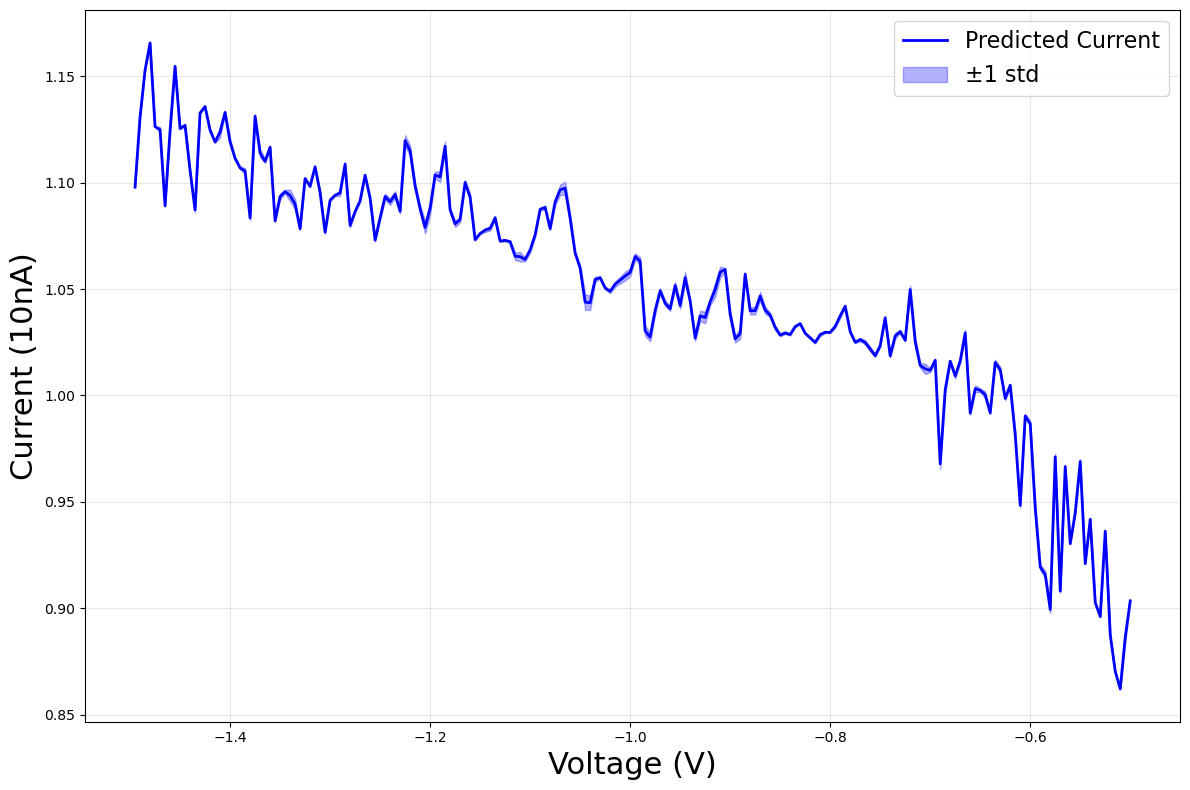

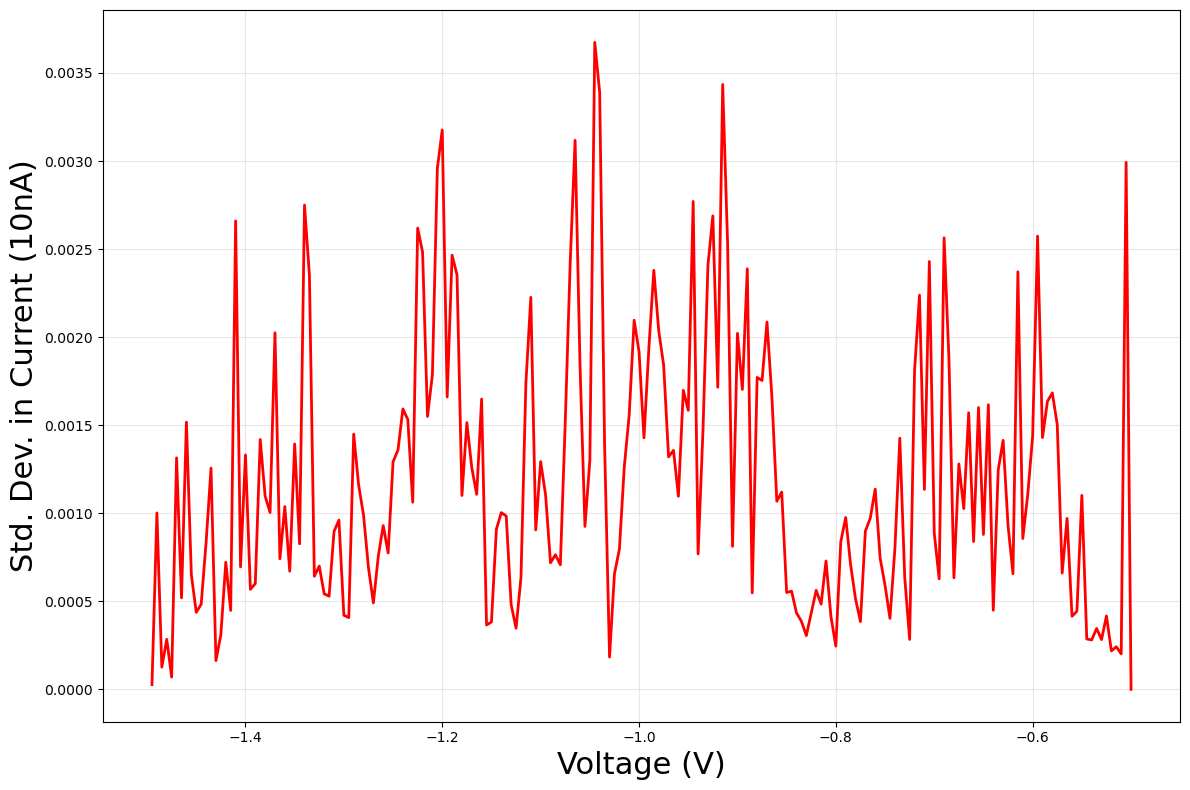

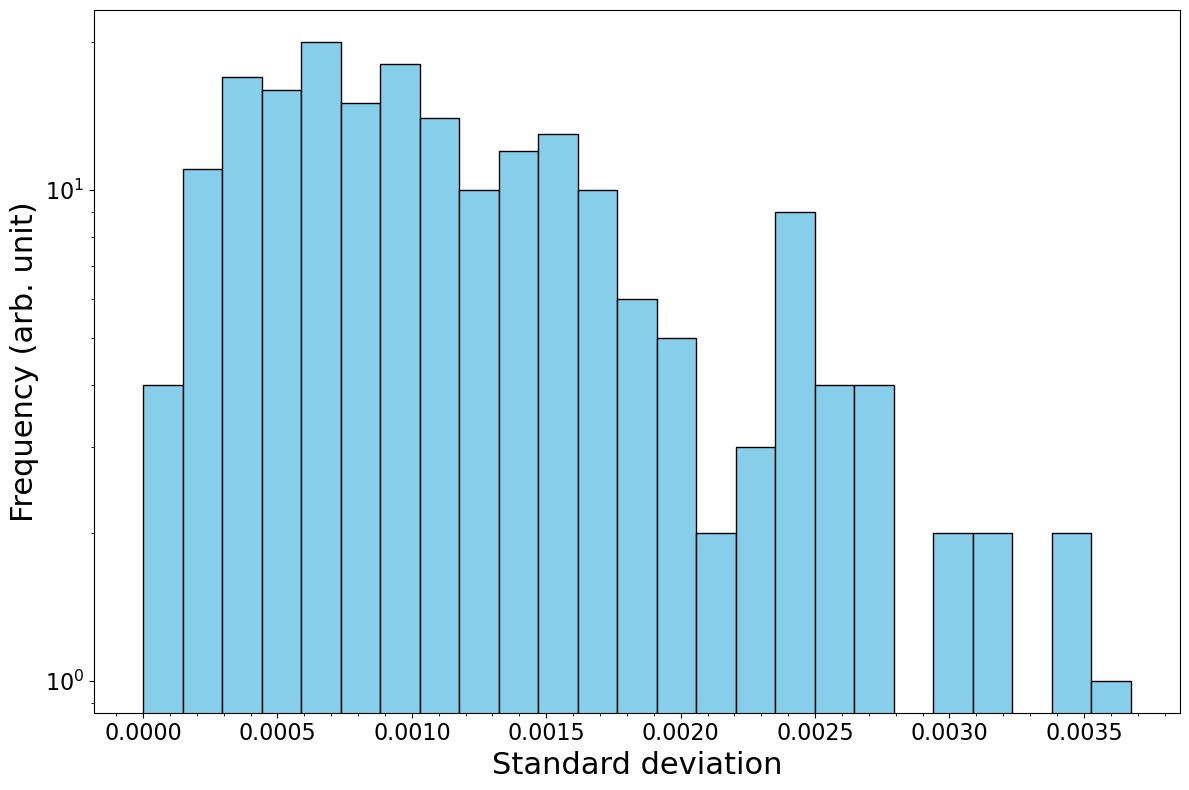

0.0011988937342326173 0.0007693798936641281


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8504\3916260876.py:278: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('|').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(coords[:, 0], np.zeros_like(coords[:, 0]), s=10,


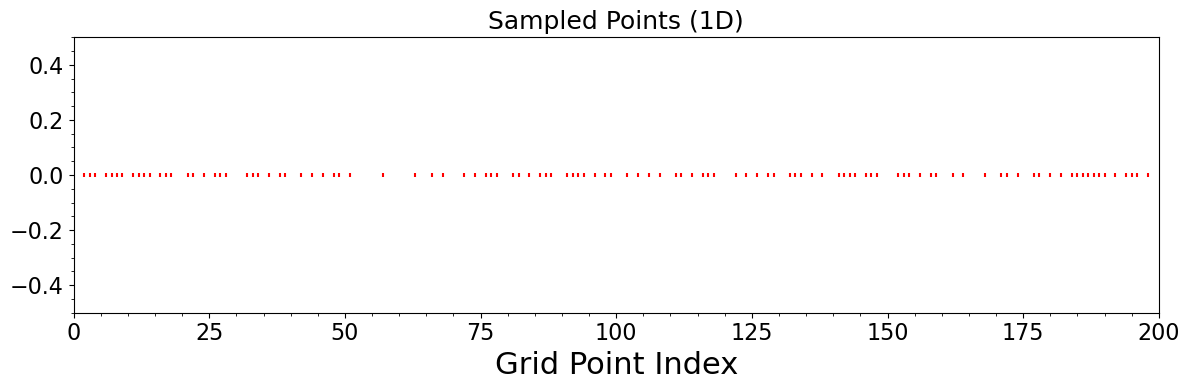

1.5552191734313965 0.02592031955718994
('USB0::0x0B21::0x0039::91VB29495::INSTR', 'ASRL7::INSTR', 'GPIB0::15::INSTR', 'GPIB1::1::INSTR', 'GPIB1::2::INSTR', 'GPIB1::3::INSTR', 'GPIB1::4::INSTR', 'GPIB1::5::INSTR', 'GPIB1::6::INSTR', 'GPIB1::9::INSTR', 'GPIB1::10::INSTR', 'GPIB1::20::INSTR', 'GPIB1::22::INSTR', 'GPIB1::23::INSTR', 'GPIB1::26::INSTR')
1  dimensions
-0.5 -1.5  boundary parameters for 1D
200 0.001  n1, tolsig
36  initial points
coarse 1D 36
Multi_knn 6
train0: the first training
120 40000 0.003
120 200 0.6
200 1
45.632298707962036 0.7605383117993673


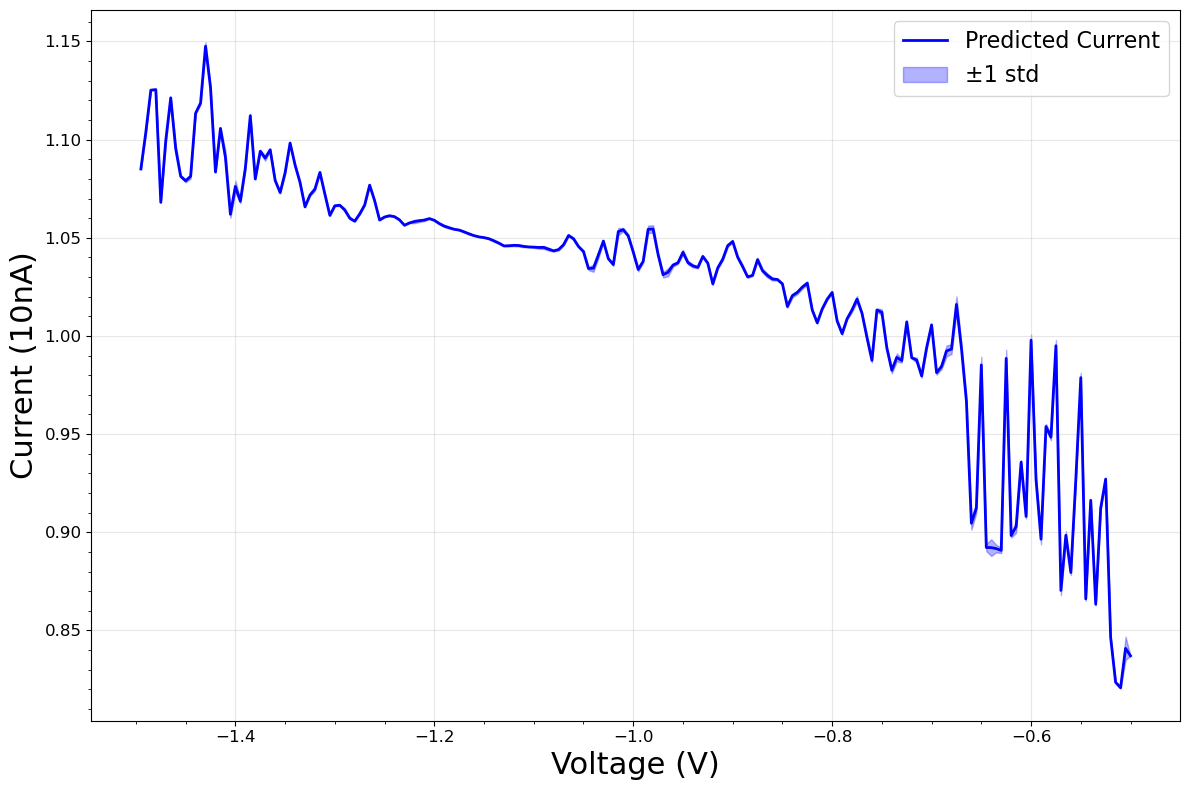

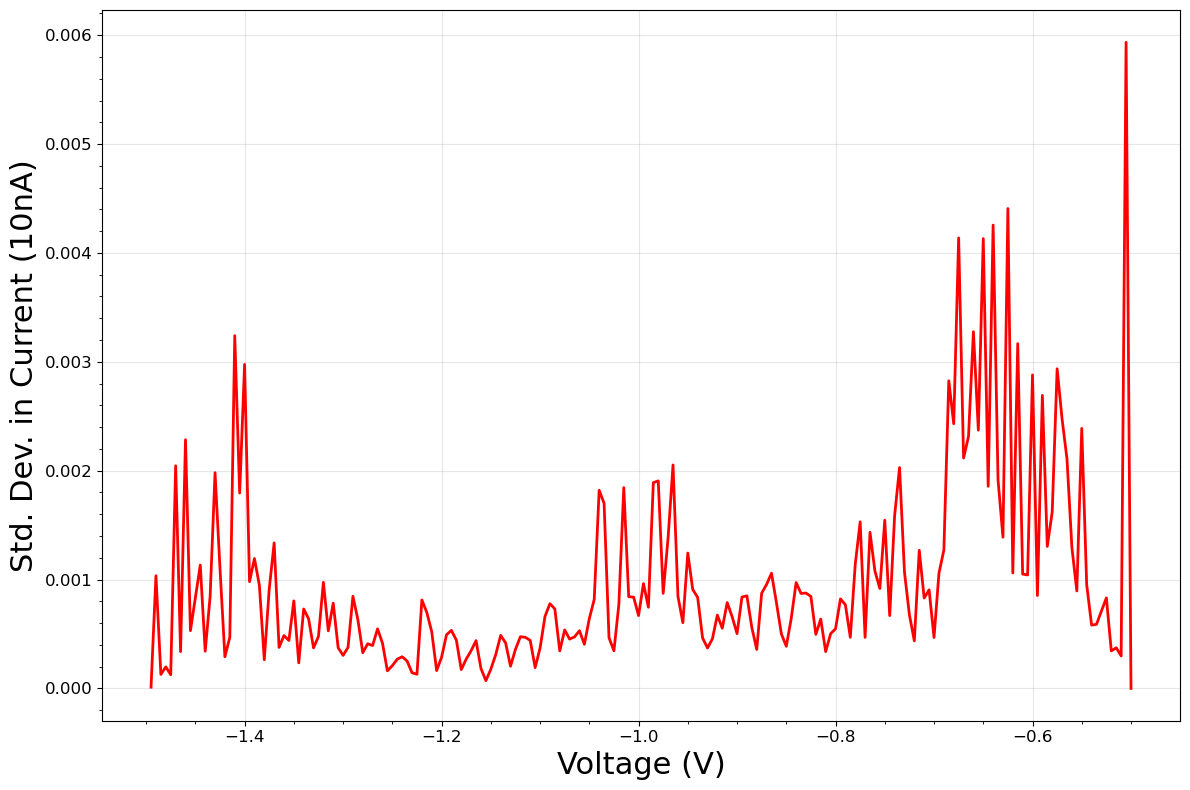

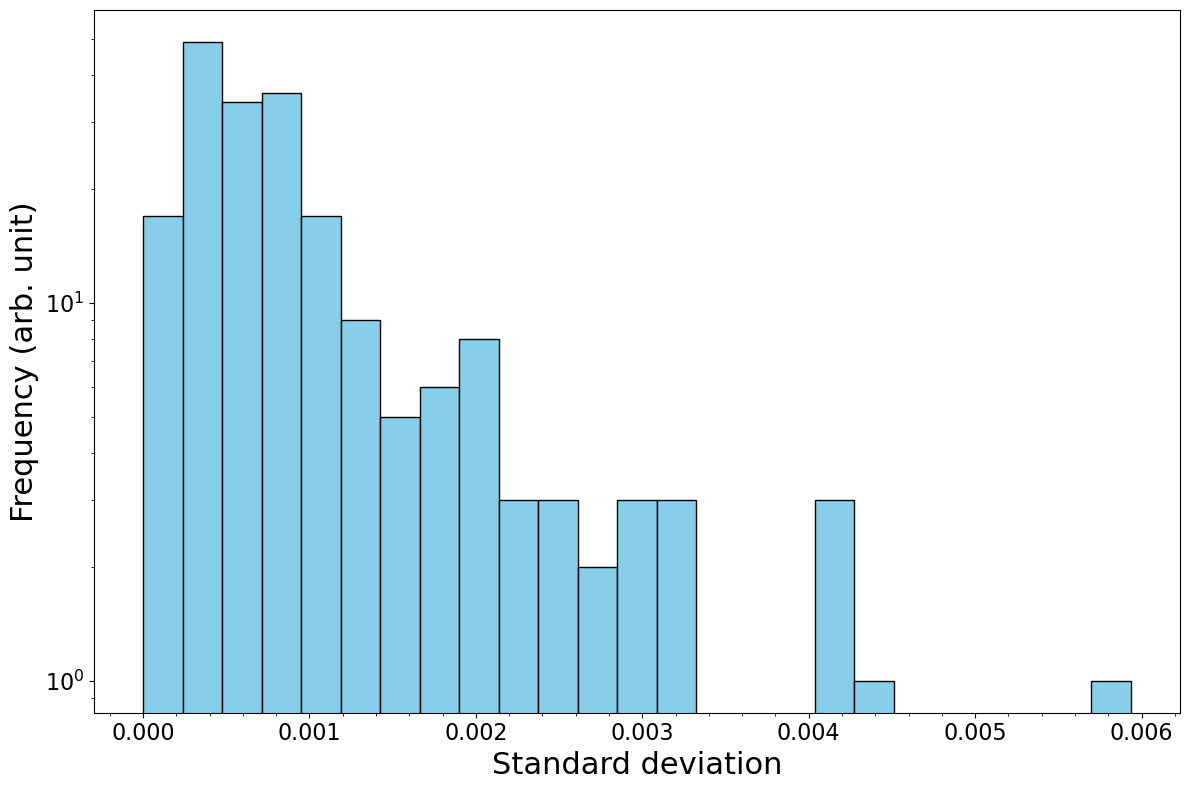

0.000980671052233382 0.000903664683215455


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8504\3916260876.py:278: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('|').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(coords[:, 0], np.zeros_like(coords[:, 0]), s=10,


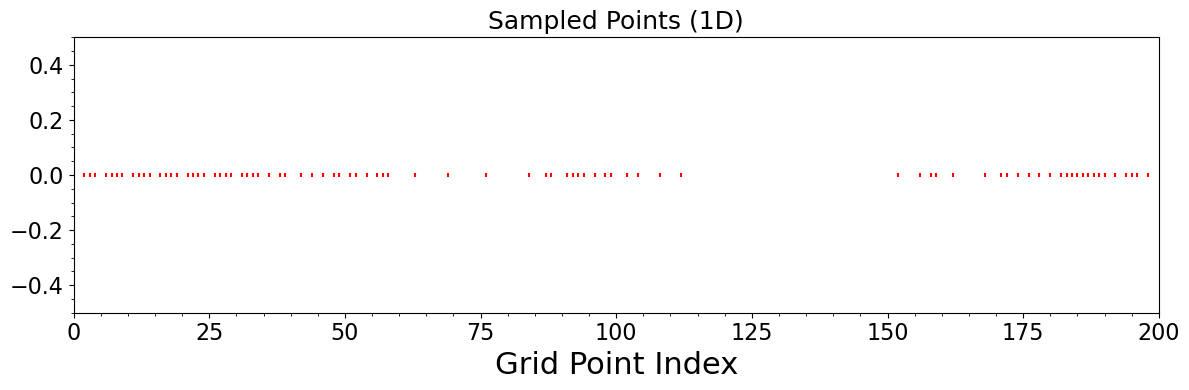

1.3654546737670898 0.022757577896118163
('USB0::0x0B21::0x0039::91VB29495::INSTR', 'ASRL7::INSTR', 'GPIB0::15::INSTR', 'GPIB1::1::INSTR', 'GPIB1::2::INSTR', 'GPIB1::3::INSTR', 'GPIB1::4::INSTR', 'GPIB1::5::INSTR', 'GPIB1::6::INSTR', 'GPIB1::9::INSTR', 'GPIB1::10::INSTR', 'GPIB1::20::INSTR', 'GPIB1::22::INSTR', 'GPIB1::23::INSTR', 'GPIB1::26::INSTR')
1  dimensions
-0.5 -1.5  boundary parameters for 1D
200 0.001  n1, tolsig
36  initial points
coarse 1D 36
Multi_knn 6
train0: the first training
76 40000 0.0019
76 200 0.38
200 1
29.32255792617798 0.488709298769633


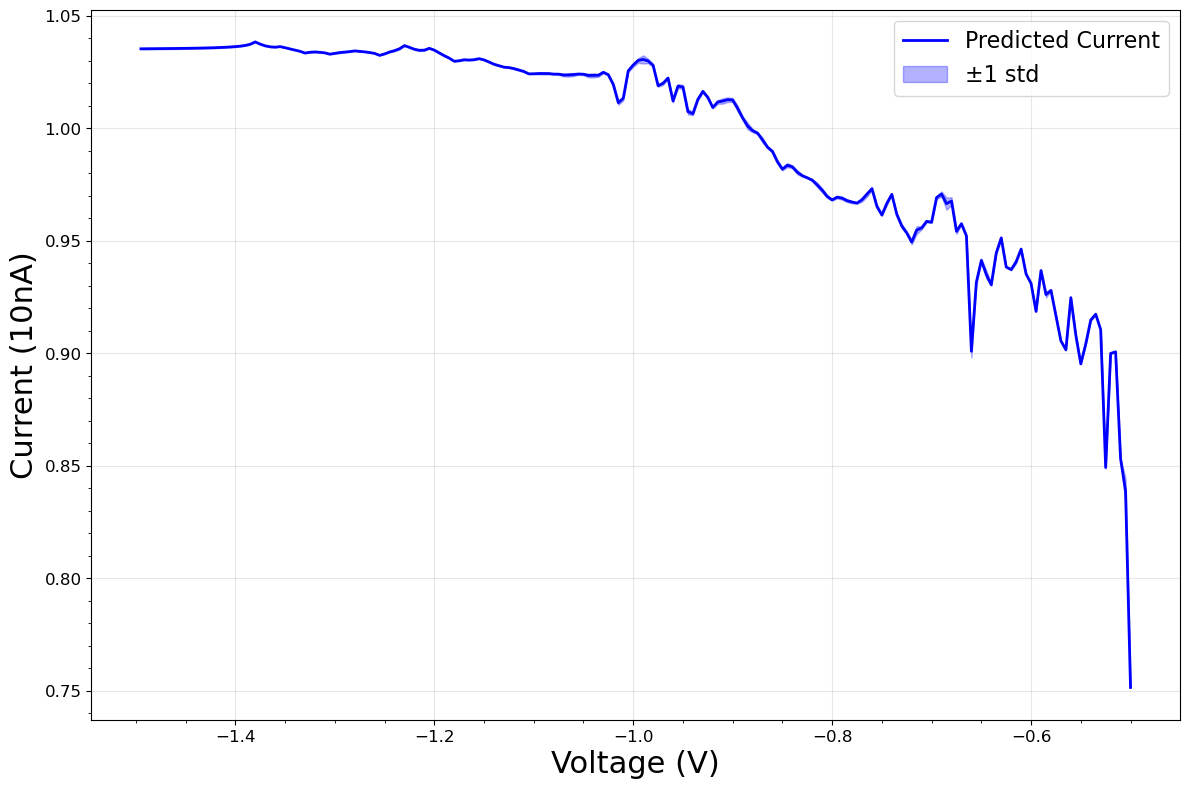

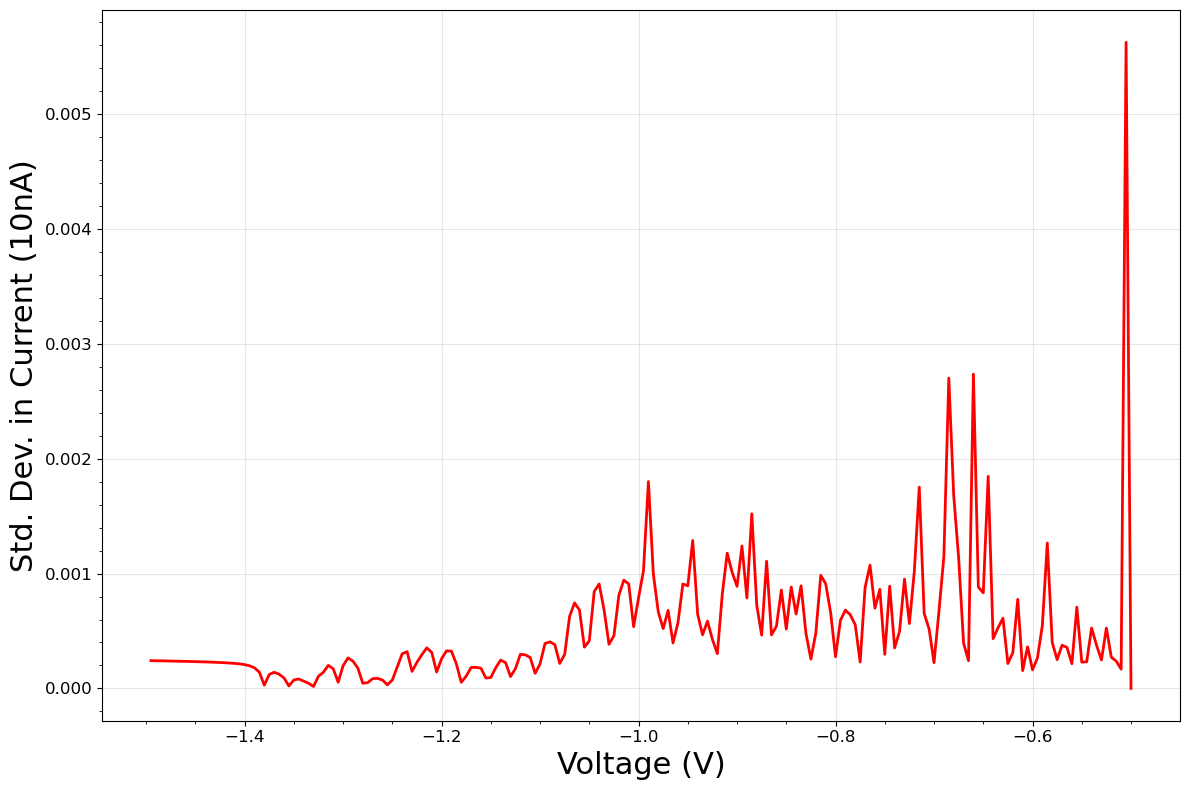

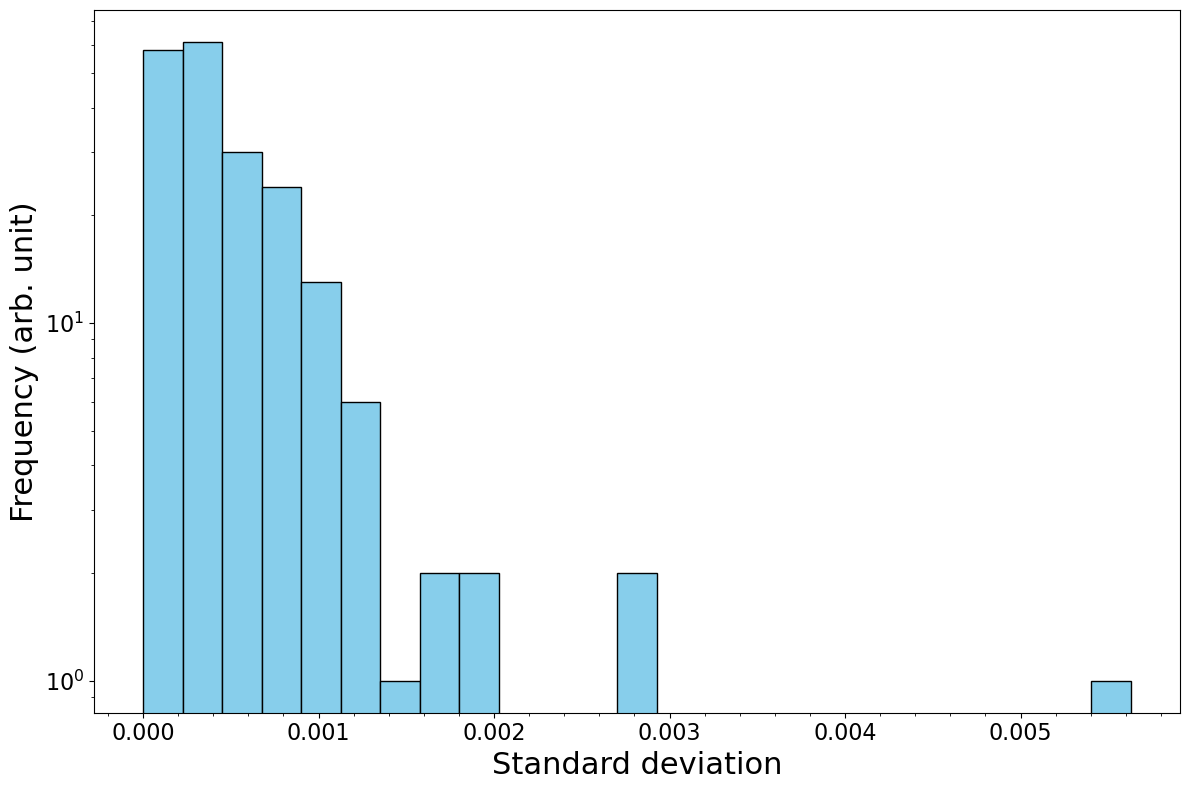

0.0005076142644412795 0.000561525234603212


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8504\3916260876.py:278: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('|').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(coords[:, 0], np.zeros_like(coords[:, 0]), s=10,


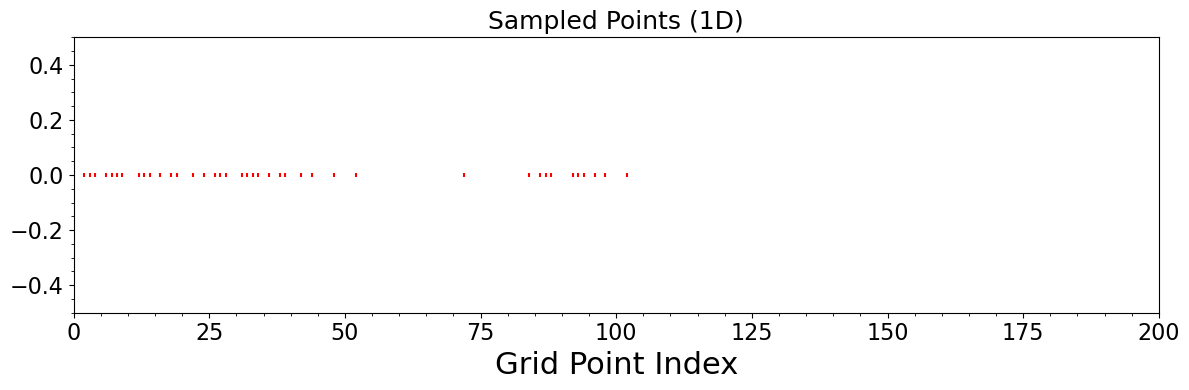

1.2970714569091797 0.021617857615152995


In [9]:
for jter in range(3):
    Info.icmd = 1
    #Info.icmd = 0
    fname_accum = 'accum_'+str(jter)+'.txt'
    Info.fname_accum = fname_accum
    Info.a0 = -20.
    Info.a1 = 20.
    Info.b0 = -20.
    Info.b1 = 20.
    Info.tolsig = 1e-3

    if True:
        Info.a0 = -0.5
        Info.a1 = -1.5
        Info.b0 = 0.3
        Info.b1 = 0.5

    Info.ntrain0 = 36
    Info.nn1 = 200
    Info.nn2 = 200

    if True:
        Info.rm = pyvisa.ResourceManager()
        print(Info.rm.list_resources())
        Info.yokogawa = Info.rm.open_resource(
            "GPIB1::4::INSTR", write_termination='\n', read_termination='\n')
        Info.multimeter = Info.rm.open_resource(
            "GPIB1::22::INSTR", write_termination='\n', read_termination='\n')
        Info.yokogawa2 = Info.rm.open_resource(
            "GPIB1::9::INSTR", write_termination='\n', read_termination='\n')
        Info.yokogawa.write("F1R5O1E")
        Info.yokogawa2.write("F1R5O1E")
    driver1(jter)
    

In [10]:
def plot_accumulated_cycles(cycle_numbers, Info):
    """
    Create accumulated plots for multiple cycles
    
    Parameters:
    cycle_numbers: list of cycle numbers to include (e.g., [0, 1, 2, 3, 4] for first 5 cycles)
    Info: Info class instance with parameters
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Storage for accumulated data
    all_nu = []
    all_st = []
    all_training_points = []
    cycle_labels = []
    valid_cycle_numbers = []  # Track which cycles actually have data
    
    # Load data from each cycle
    for jter in cycle_numbers:
        try:
            # Load the numpy files
            gname = f'accum_{jter}.npy'
            if os.path.exists(gname):
                with open(gname, 'rb') as afile:
                    nu = np.load(afile)
                    st = np.load(afile)
                all_nu.append(nu)
                all_st.append(st)
                cycle_labels.append(f'Cycle {jter}')
                valid_cycle_numbers.append(jter)
                
                # Load training points
                fname_accum = f'accum_{jter}.txt'
                if os.path.exists(fname_accum):
                    training_points = []
                    with open(fname_accum, 'r') as afile:
                        for line in afile:
                            parts = line.strip().split()
                            if len(parts) >= 2:
                                if Info.ndim == 1:
                                    training_points.append([float(parts[0]), float(parts[-1])])
                                else:  # ndim == 2
                                    training_points.append([float(parts[0]), float(parts[1]), float(parts[-1])])
                    all_training_points.append(np.array(training_points))
                else:
                    # If no training file, add empty array to maintain alignment
                    all_training_points.append(np.array([]))
            else:
                print(f"Warning: File {gname} not found for cycle {jter}")
        except Exception as e:
            print(f"Error loading data for cycle {jter}: {e}")
    
    if not all_nu:
        print("No data found for the specified cycles")
        print("Make sure you have run some experiments and the files exist:")
        for jter in cycle_numbers:
            gname = f'accum_{jter}.npy'
            fname_accum = f'accum_{jter}.txt'
            print(f"  Looking for: {gname} and {fname_accum}")
        return
    
    print(f"Found data for {len(valid_cycle_numbers)} cycles: {valid_cycle_numbers}")
    
    # Convert to numpy arrays
    all_nu = np.array(all_nu)
    all_st = np.array(all_st)
    
    if Info.ndim == 1:
        # 1D accumulated plots
        a0, a1 = Info.a0, Info.a1
        mm1 = Info.nn1
        b = np.arange(a0, a1, (a1-a0)/mm1)
        b = b[:all_nu.shape[1]]  # Ensure matching dimensions
        
        # Plot 1: All prediction curves
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
        
        colors = plt.cm.viridis(np.linspace(0, 1, len(cycle_numbers)))
        for i, (nu, st, label, color) in enumerate(zip(all_nu, all_st, cycle_labels, colors)):
            ax1.plot(b, nu, color=color, linewidth=2, label=label, alpha=0.8)
            ax1.fill_between(b, nu - st, nu + st, alpha=0.2, color=color)
        
        ax1.set_xlabel('Voltage (V)', fontsize=16)
        ax1.set_ylabel('Current (10nA)', fontsize=16)
        ax1.set_title('Predicted Current vs Voltage - All Cycles', fontsize=18)
        ax1.legend(fontsize=12)
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Standard deviation comparison
        for i, (st, label, color) in enumerate(zip(all_st, cycle_labels, colors)):
            ax2.plot(b, st, color=color, linewidth=2, label=label, alpha=0.8)
        
        ax2.set_xlabel('Voltage (V)', fontsize=16)
        ax2.set_ylabel('Std. Dev. in Current (10nA)', fontsize=16)
        ax2.set_title('Standard Deviation - All Cycles', fontsize=18)
        ax2.legend(fontsize=12)
        ax2.grid(True, alpha=0.3)
        ax2.set_yscale('log')
        
        plt.tight_layout()
        plt.savefig(f'accumulated_1d_cycles_{valid_cycle_numbers[0]}_to_{valid_cycle_numbers[-1]}.pdf')
        plt.show()
        plt.close()
        
        # Plot 3: Mean and std statistics across cycles
        mean_nu = np.mean(all_nu, axis=0)
        std_nu = np.std(all_nu, axis=0)
        mean_st = np.mean(all_st, axis=0)
        std_st = np.std(all_st, axis=0)
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
        
        ax1.plot(b, mean_nu, 'b-', linewidth=3, label='Mean across cycles')
        ax1.fill_between(b, mean_nu - std_nu, mean_nu + std_nu, alpha=0.3, color='blue', 
                        label='±1 std across cycles')
        ax1.set_xlabel('Voltage (V)', fontsize=16)
        ax1.set_ylabel('Current (10nA)', fontsize=16)
        ax1.set_title('Mean Prediction Across All Cycles', fontsize=18)
        ax1.legend(fontsize=12)
        ax1.grid(True, alpha=0.3)
        
        ax2.plot(b, mean_st, 'r-', linewidth=3, label='Mean uncertainty')
        ax2.fill_between(b, mean_st - std_st, mean_st + std_st, alpha=0.3, color='red',
                        label='±1 std of uncertainty')
        ax2.set_xlabel('Voltage (V)', fontsize=16)
        ax2.set_ylabel('Mean Std. Dev. in Current (10nA)', fontsize=16)
        ax2.set_title('Mean Uncertainty Across All Cycles', fontsize=18)
        ax2.legend(fontsize=12)
        ax2.grid(True, alpha=0.3)
        ax2.set_yscale('log')
        
        plt.tight_layout()
        plt.savefig(f'accumulated_1d_statistics_{valid_cycle_numbers[0]}_to_{valid_cycle_numbers[-1]}.pdf')
        plt.show()
        plt.close()
        
        # Plot 4: Training points evolution
        if all_training_points:
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
            
            # Number of training points per cycle - use valid_cycle_numbers
            n_points = [len(points) for points in all_training_points]
            ax1.plot(valid_cycle_numbers, n_points, 'go-', linewidth=2, markersize=8)
            ax1.set_xlabel('Cycle Number', fontsize=16)
            ax1.set_ylabel('Number of Training Points', fontsize=16)
            ax1.set_title('Training Points Evolution', fontsize=18)
            ax1.grid(True, alpha=0.3)
            
            # Training point distribution
            for i, (points, label, color) in enumerate(zip(all_training_points, cycle_labels, colors)):
                if len(points) > 0:
                    voltages = points[:, 0]
                    cycle_num = valid_cycle_numbers[i]  # Use actual cycle number
                    ax2.scatter(voltages, [cycle_num] * len(voltages), alpha=0.6, s=20, 
                              color=color, label=label)
            
            ax2.set_xlabel('Voltage (V)', fontsize=16)
            ax2.set_ylabel('Cycle Number', fontsize=16)
            ax2.set_title('Training Point Distribution Across Cycles', fontsize=18)
            ax2.legend(fontsize=12)
            ax2.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.savefig(f'training_points_evolution_{valid_cycle_numbers[0]}_to_{valid_cycle_numbers[-1]}.pdf')
            plt.show()
            plt.close()
    
    else:  # ndim == 2
        # 2D accumulated plots
        a0, a1, b0, b1 = Info.a0, Info.a1, Info.b0, Info.b1
        mm1, mm2 = Info.nn1, Info.nn2
        b = np.arange(a0, a1, (a1-a0)/mm1)
        d = np.arange(b0, b1, (b1-b0)/mm2)
        B, D = np.meshgrid(b, d)
        
        # Ensure dimensions match
        B = B[:all_nu.shape[1], :all_nu.shape[2]]
        D = D[:all_nu.shape[1], :all_nu.shape[2]]
        
        # Plot mean and std across cycles
        mean_nu = np.mean(all_nu, axis=0)
        std_nu = np.std(all_nu, axis=0)
        mean_st = np.mean(all_st, axis=0)
        
        # 3D surface plots
        fig = plt.figure(figsize=(18, 6))
        
        ax1 = fig.add_subplot(131, projection='3d')
        ax1.plot_surface(B, D, mean_nu, cmap='viridis')
        ax1.set_xlabel('$V_1$ (V)', fontsize=14)
        ax1.set_ylabel('$V_2$ (V)', fontsize=14)
        ax1.set_zlabel('Mean Current (10nA)', fontsize=14)
        ax1.set_title('Mean Across Cycles', fontsize=16)
        
        ax2 = fig.add_subplot(132, projection='3d')
        ax2.plot_surface(B, D, std_nu, cmap='plasma')
        ax2.set_xlabel('$V_1$ (V)', fontsize=14)
        ax2.set_ylabel('$V_2$ (V)', fontsize=14)
        ax2.set_zlabel('Std Across Cycles (10nA)', fontsize=14)
        ax2.set_title('Variability Across Cycles', fontsize=16)
        
        ax3 = fig.add_subplot(133, projection='3d')
        ax3.plot_surface(B, D, mean_st, cmap='hot')
        ax3.set_xlabel('$V_1$ (V)', fontsize=14)
        ax3.set_ylabel('$V_2$ (V)', fontsize=14)
        ax3.set_zlabel('Mean Uncertainty (10nA)', fontsize=14)
        ax3.set_title('Mean Uncertainty', fontsize=16)
        
        plt.tight_layout()
        plt.savefig(f'accumulated_2d_summary_{valid_cycle_numbers[0]}_to_{valid_cycle_numbers[-1]}.pdf')
        plt.show()
        plt.close()
        
        # Contour plots
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Mean prediction
        CS1 = axes[0,0].contourf(B, D, mean_nu, levels=20, cmap='viridis')
        axes[0,0].set_title('Mean Prediction Across Cycles', fontsize=14)
        axes[0,0].set_xlabel('$V_1$ (V)', fontsize=12)
        axes[0,0].set_ylabel('$V_2$ (V)', fontsize=12)
        plt.colorbar(CS1, ax=axes[0,0])
        
        # Std across cycles
        CS2 = axes[0,1].contourf(B, D, std_nu, levels=20, cmap='plasma')
        axes[0,1].set_title('Std Across Cycles', fontsize=14)
        axes[0,1].set_xlabel('$V_1$ (V)', fontsize=12)
        axes[0,1].set_ylabel('$V_2$ (V)', fontsize=12)
        plt.colorbar(CS2, ax=axes[0,1])
        
        # Mean uncertainty
        CS3 = axes[1,0].contourf(B, D, mean_st, levels=20, cmap='hot')
        axes[1,0].set_title('Mean Uncertainty', fontsize=14)
        axes[1,0].set_xlabel('$V_1$ (V)', fontsize=12)
        axes[1,0].set_ylabel('$V_2$ (V)', fontsize=12)
        plt.colorbar(CS3, ax=axes[1,0])
        
        # Training points from last cycle
        if all_training_points and len(all_training_points[-1]) > 0:
            last_points = all_training_points[-1]
            axes[1,1].scatter(last_points[:, 0], last_points[:, 1], 
                            c='red', s=10, alpha=0.6)
            axes[1,1].set_title(f'Training Points - Cycle {valid_cycle_numbers[-1]}', fontsize=14)
            axes[1,1].set_xlabel('$V_1$ (V)', fontsize=12)
            axes[1,1].set_ylabel('$V_2$ (V)', fontsize=12)
            axes[1,1].set_xlim(a0, a1)
            axes[1,1].set_ylim(b0, b1)
        
        plt.tight_layout()
        plt.savefig(f'accumulated_2d_contours_{valid_cycle_numbers[0]}_to_{valid_cycle_numbers[-1]}.pdf')
        plt.show()
        plt.close()
    
    # Summary statistics
    print(f"\n=== Accumulated Analysis for Cycles {valid_cycle_numbers} ===")
    print(f"Number of cycles analyzed: {len(valid_cycle_numbers)}")
    if all_training_points:
        total_points = [len(points) for points in all_training_points]
        print(f"Training points per cycle: {total_points}")
        print(f"Total training points: {sum(total_points)}")
        print(f"Average training points per cycle: {np.mean(total_points):.1f} ± {np.std(total_points):.1f}")
    
    if Info.ndim == 1:
        print(f"Mean prediction range: {np.min(all_nu):.4f} to {np.max(all_nu):.4f}")
        print(f"Mean uncertainty: {np.mean(all_st):.6f} ± {np.std(all_st):.6f}")
    else:
        print(f"Mean prediction range: {np.min(all_nu):.4f} to {np.max(all_nu):.4f}")
        print(f"Mean uncertainty: {np.mean(all_st):.6f} ± {np.std(all_st):.6f}")


# Function to call after your main loop
def create_accumulated_plots_after_cycles():
    """
    Call this function after running multiple cycles to create accumulated plots
    """
    # First, check which cycles actually exist
    existing_cycles = []
    for i in range(20):  # Check first 20 cycles
        if os.path.exists(f'accum_{i}.npy'):
            existing_cycles.append(i)
    
    if not existing_cycles:
        print("No cycle data found. Make sure you have run some experiments first.")
        return
    
    print(f"Found data for cycles: {existing_cycles}")
    
    # Plot first 5 existing cycles, or all if fewer than 5
    cycles_to_plot = existing_cycles[:5]
    print(f"Plotting cycles: {cycles_to_plot}")
    plot_accumulated_cycles(cycles_to_plot, Info)
    
    # You can also plot specific cycles
    # plot_accumulated_cycles([0, 2, 4], Info)  # Plot cycles 0, 2, 4
    # plot_accumulated_cycles(existing_cycles[-5:], Info)  # Plot last 5 cycles

Found data for cycles: [0, 1, 2]
Plotting cycles: [0, 1, 2]
Found data for 3 cycles: [0, 1, 2]


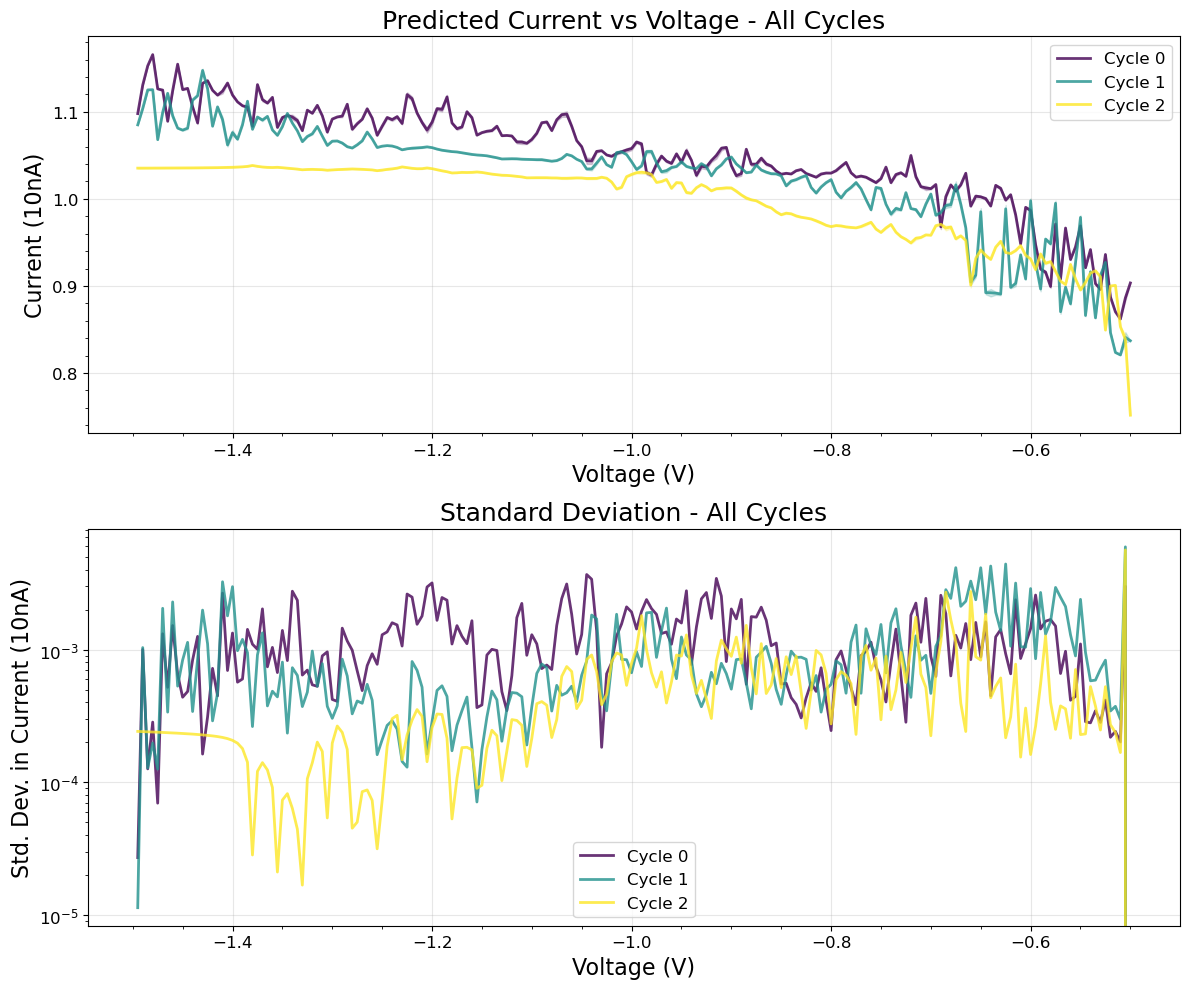

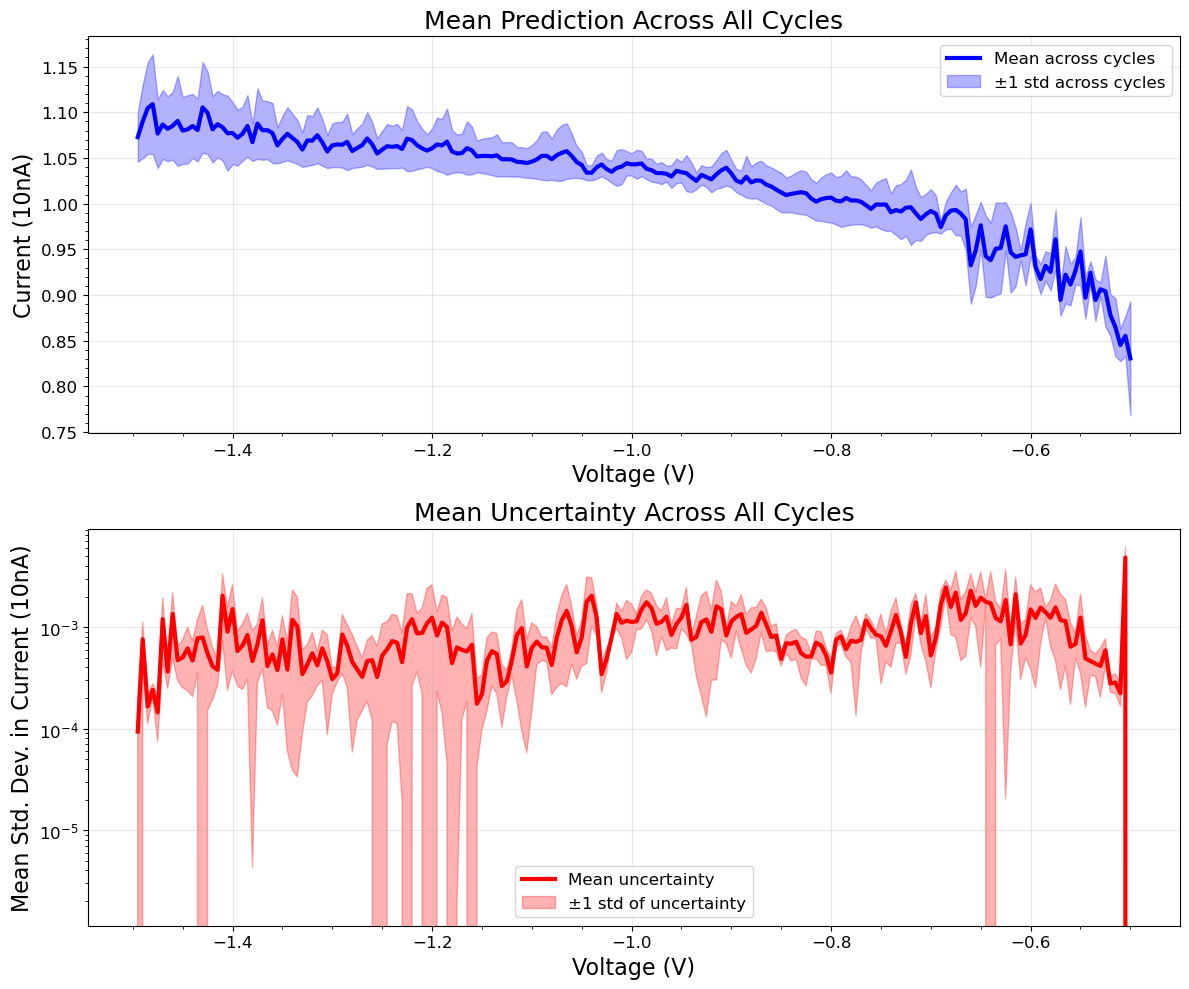

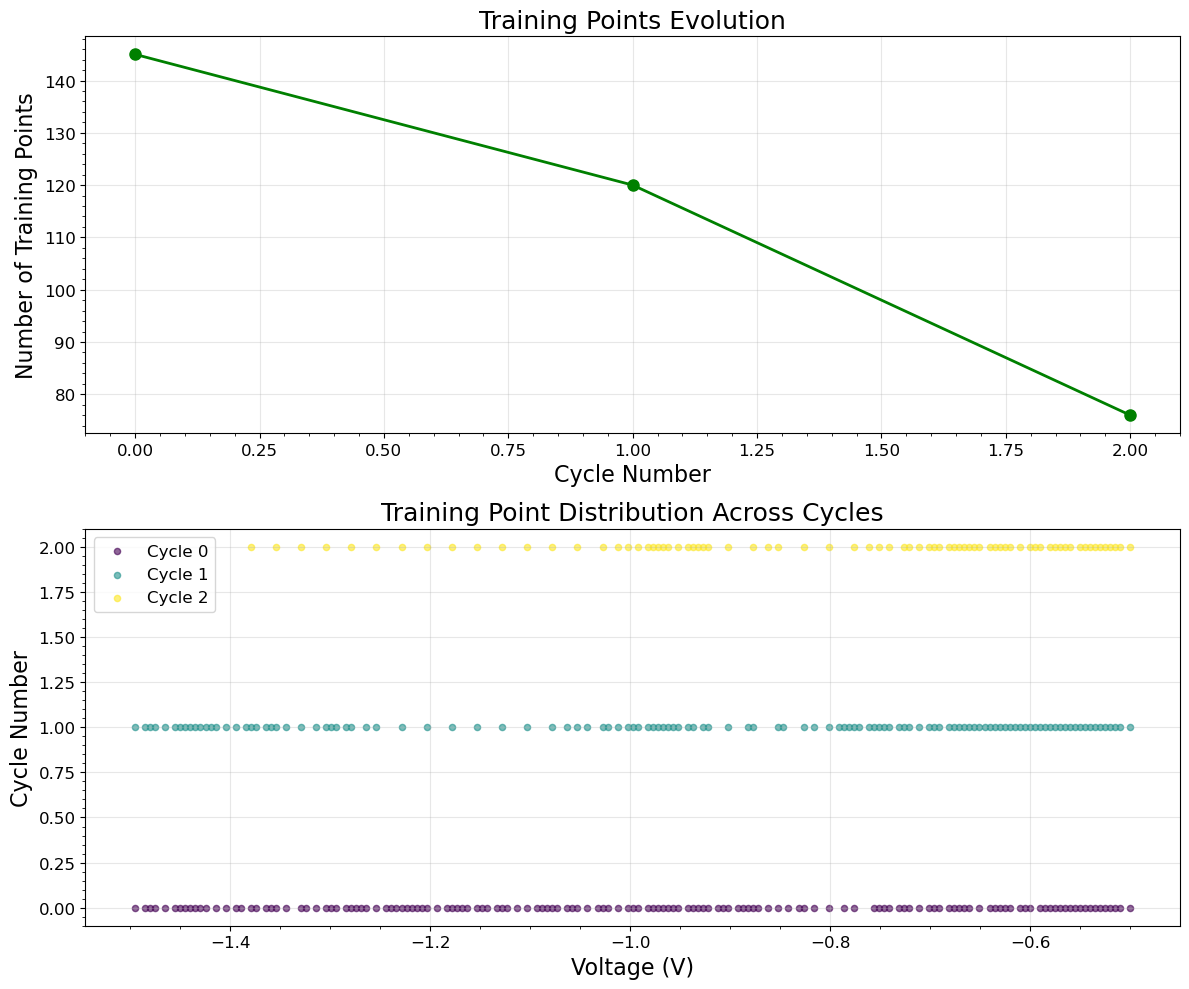


=== Accumulated Analysis for Cycles [0, 1, 2] ===
Number of cycles analyzed: 3
Training points per cycle: [145, 120, 76]
Total training points: 341
Average training points per cycle: 113.7 ± 28.5
Mean prediction range: 0.7515 to 1.1658
Mean uncertainty: 0.000896 ± 0.000811


In [11]:
create_accumulated_plots_after_cycles()